# Computational Illustration for Chapter 04: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The case of two linearly separable classes
blue dots labeled negatively, red crosses labeled positively

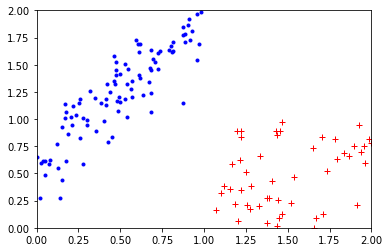

In [2]:
# generate the data
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                    # abscissae of the blue dots
X0_y = 3/2*X0_x + 1/2 + np.random.normal(0,0.2,m0)  # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(1,2,m1)                    # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                    # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

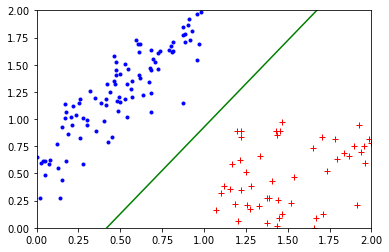

In [3]:
# separating "hyperplane" produced by a linear feasibility problem
from scipy.optimize import linprog
obj_feas = np.zeros(3)                                   # the dummy objective function
mat_ineq = np.column_stack((np.row_stack((+X0,-X1)),  # the matrix of inequality constraints
                            np.row_stack((+np.ones((m0,1)),-np.ones((m1,1))))))
vec_ineq = -np.ones((m0+m1,1))                        # the vector of inequality constraints
opt_feas = linprog(c=obj_feas, A_ub=mat_ineq, b_ub=vec_ineq, bounds=(None,None), method="interior-point")
w_feas1 = opt_feas.x[0]
w_feas2 = opt_feas.x[1]
b_feas = -opt_feas.x[2]
# visualize the "hyperplane" (in green)
grid_x = np.linspace(0,2,21)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.plot(grid_x,(-w_feas1*grid_x+b_feas)/w_feas2,'g')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

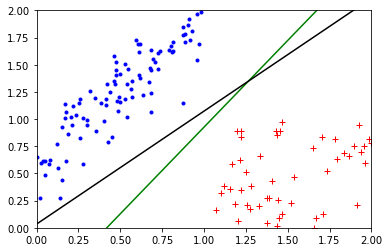

In [4]:
# separating "hyperplane" produced by the perceptron algorithm
from numpy import linalg as LA
X = np.row_stack((np.column_stack((X0,np.ones((m0,1)))),
                  np.column_stack((X1,np.ones((m1,1))))))
y = np.row_stack((-np.ones((m0,1)),np.ones((m1,1))))
w_perc = np.zeros((3,1))
obj_perc = y*(X@w_perc)
while min(obj_perc)<=0:
    i = np.argmin(obj_perc)
    w_perc = w_perc + (y[i]/LA.norm(X[i,:])**2)*np.transpose([X[i,:]])
    obj_perc = y*(X@w_perc)
w_perc1 = w_perc[0]
w_perc2 = w_perc[1]
b_perc = -w_perc[2]
# visualize the "hyperplane" (in black)    
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.plot(grid_x,(-w_feas1*grid_x+b_feas)/w_feas2,'g')
plt.plot(grid_x,(-w_perc1*grid_x+b_perc)/w_perc2,'k')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

Using license file /Users/foucart/gurobi.lic
Academic license - for non-commercial use only


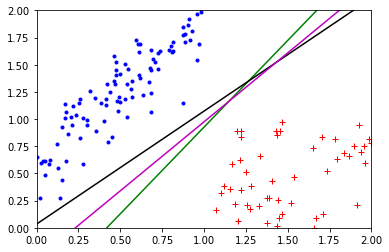

In [5]:
# separating "hyperplane" produced by hard SVM
import gurobipy as gp
from gurobipy import GRB
hardsvm = gp.Model("Hard_SVM")
hardsvm.setParam('OutputFlag',False)
w_hard1 = hardsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
w_hard2 = hardsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
b_hard = hardsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
hardsvm.setObjective( (w_hard1*w_hard1+w_hard2*w_hard2), GRB.MINIMIZE)
hardsvm.addConstrs( X0[i,0]*w_hard1 + X0[i,1]*w_hard2 - b_hard <= -1 for i in range(m0) )
hardsvm.addConstrs( X1[i,0]*w_hard1 + X1[i,1]*w_hard2 - b_hard >= +1 for i in range(m1) )
hardsvm.optimize()
# visualize the "hyperplane" (in magenta)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.plot(grid_x,(-w_feas1*grid_x+b_feas)/w_feas2,'g')
plt.plot(grid_x,(-w_perc1*grid_x+b_perc)/w_perc2,'k')
plt.plot(grid_x,(-w_hard1.X*grid_x+b_hard.x)/w_hard2.X,'m')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

## The case of two almost linearly separable classes 
blue dots labeled negatively, red crosses labeled positively

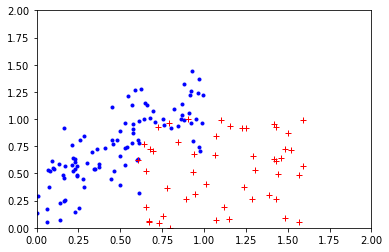

In [6]:
# generate the data 
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                      # abscissae of the blue dots
X0_y = X0_x + 1/4 + np.random.normal(0,0.2,m0)        # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(0.6,1.6,m1)                  # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                      # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

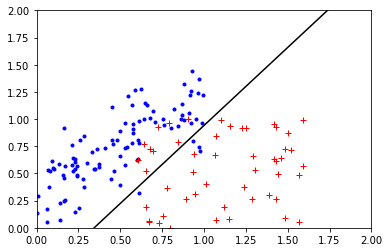

In [7]:
# "hyperplane" produced by soft SVM
lamb = 1e-3
softsvm = gp.Model("Soft_SVM")
softsvm.setParam('OutputFlag',False)
w_soft1 = softsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
w_soft2 = softsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
xi_soft = softsvm.addVars(m0+m1, lb=0, ub=GRB.INFINITY)
b_soft = softsvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
softsvm.setObjective(w_soft1*w_soft1+w_soft2*w_soft2 + xi_soft.sum()/lamb, GRB.MINIMIZE)
softsvm.addConstrs( X0[i,0]*w_soft1 + X0[i,1]*w_soft2 - b_soft <= -1+xi_soft[i] for i in range(m0) )
softsvm.addConstrs( X1[i,0]*w_soft1 + X1[i,1]*w_soft2 - b_soft >= +1-xi_soft[m0+i] for i in range(m1) )
softsvm.optimize()
# visualize the "hyperplane" (in black)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.plot(grid_x,(-w_soft1.X*grid_x+b_soft.X)/w_soft2.X,'k')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

## First case of two classes clearly not linearly separable
blue dots labeled negatively, red crosses labeled positively

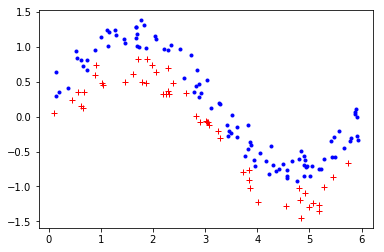

In [8]:
# generate the data
m0 = 100;
m1 = 50;
m = m0+m1
X0_x = np.random.uniform(0,6,m0)                     # abscissae of thr blue dots
X0_y = np.sin(X0_x) + np.random.uniform(0,0.5,m0)    # their ordinates
X0 = np.column_stack( (X0_x, X0_y) )
X1_x = np.random.uniform(0,6,m1)                     # abscissae of the red crosses
X1_y = np.sin(X1_x) - np.random.uniform(0,0.5,m1)    # their ordinates
X1 = np.column_stack( (X1_x, X1_y) )
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.show()

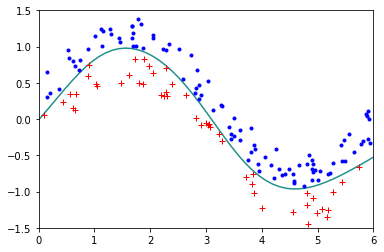

In [9]:
# Soft SVM with a polynomial kernel
X = np.row_stack( (X0,X1) )
y = np.row_stack( (-np.ones((m0,1)),+np.ones((m1,1)) ))
K_poly = (1+X@np.transpose(X))**3
lamb = 1e-3
polysvm = gp.Model("Poly_SVM")
polysvm.setParam('OutputFlag',False)
a_poly = polysvm.addVars(m, lb=-GRB.INFINITY, ub=GRB.INFINITY)
b_poly = polysvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
xi_poly = polysvm.addVars(m, lb=0, ub=GRB.INFINITY)
obj = 0
for i in range(m):
    for j in range(m):
        obj = obj + a_poly[i]*a_poly[j]*K_poly[i,j]
polysvm.setObjective(obj + xi_poly.sum()/lamb, GRB.MINIMIZE)
polysvm.addConstrs( gp.quicksum(K_poly[i,j]*a_poly[j] for j in range(m)) - b_poly <= -1+xi_poly[i] for i in range(m0))
polysvm.addConstrs( gp.quicksum(K_poly[m0+i,j]*a_poly[j] for j in range(m)) - b_poly >= +1-xi_poly[m0+i] for i in range(m1)) 
polysvm.optimize()
# visualize the separating surface
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
grid_x = np.linspace(0,6,51)
grid_y = np.linspace(-1.5,1.5,51)
u,v = np.meshgrid(grid_x,grid_y)
f = sum( a_poly[i].x*(1+X[i,0]*u+X[i,1]*v)**3 for i in range(m) )
plt.contour(grid_x,grid_y,f-b_poly.x,0)
plt.show()

## Second case of two classes clearly not linearly separable
blue dots labeled negatively, red crosses labeled positively

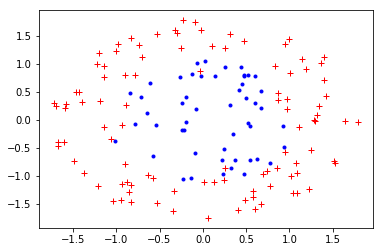

In [10]:
# generate the data
m0 = 50
m1 = 100
m = m0+m1
r0 = 1.1*np.sqrt(np.random.uniform(0,1,m0))
theta0 = np.random.uniform(0,2*np.pi,m0)
r1 = 0.8 + np.sqrt(np.random.uniform(0,1,m1))
theta1 = np.random.uniform(0,2*np.pi,m1)
X0 = np.column_stack( (r0*np.cos(theta0), r0*np.sin(theta0)) )
X1 = np.column_stack( (r1*np.cos(theta1), r1*np.sin(theta1)) )
X = np.row_stack((X0,X1))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
plt.show()

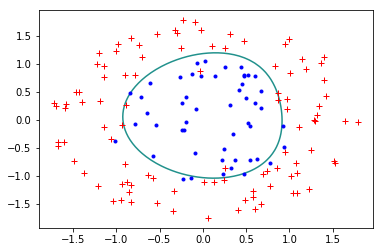

In [11]:
# Soft SVM with a gaussian kernel
sigma = 1
K_gauss = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        K_gauss[i,j] = np.exp(-LA.norm(X[i,:]-X[j,:])**2/(2*sigma**2))
lamb = 0.2
gausssvm = gp.Model("Gauss_SVM")
gausssvm.setParam('OutputFlag',False)
a_gauss = gausssvm.addVars(m,lb=-GRB.INFINITY, ub=GRB.INFINITY)
b_gauss = gausssvm.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY)
xi_gauss = gausssvm.addVars(m,lb=0, ub=GRB.INFINITY)
obj = 0
for i in range(m):
    for j in range(m):
        obj = obj + a_gauss[i]*a_gauss[j]*K_gauss[i,j]
gausssvm.setObjective(obj + xi_gauss.sum()/lamb, GRB.MINIMIZE)
gausssvm.addConstrs( gp.quicksum(K_gauss[i,j]*a_gauss[j] for j in range(m)) - b_gauss <= -1+xi_gauss[i] for i in range(m0))
gausssvm.addConstrs( gp.quicksum(K_gauss[m0+i,j]*a_gauss[j] for j in range(m)) - b_gauss >= +1-xi_gauss[m0+i] for i in range(m1)) 
gausssvm.optimize()
# visualize the separating surface
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+')
grid_x = np.linspace(-1.5,1.5,51)
grid_y = np.linspace(-1.5,1.5,51)
u,v = np.meshgrid(grid_x,grid_y)
f = sum( a_gauss[i].x*np.exp(-( (X[i,0]-u)**2 + (X[i,1]-v)**2 )/(2*sigma**2)) for i in range(m) )
plt.contour(grid_x,grid_y,f-b_gauss.x,0)
plt.show()